# EDA (Exploratory Data Analysis) of the dataset

In this notebook, explore the Abalone dataset, by showing relevant visualizations that help understand the problem you are modelling.

Please make sure to write down your conclusions in the final notebook and to remove these intructions.

# Imports

In [3]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data

In [4]:
df = pd.read_csv("../data/abalone.csv")
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# EDA

In [5]:
# Aperçu général du dataset
print("Shape:", df.shape)
df.info()
df.describe()


Shape: (4177, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [6]:
# Vérification de la qualité des données
print("Valeurs manquantes :\n", df.isnull().sum())
print("\nDoublons :", df.duplicated().sum())


Valeurs manquantes :
 Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

Doublons : 0


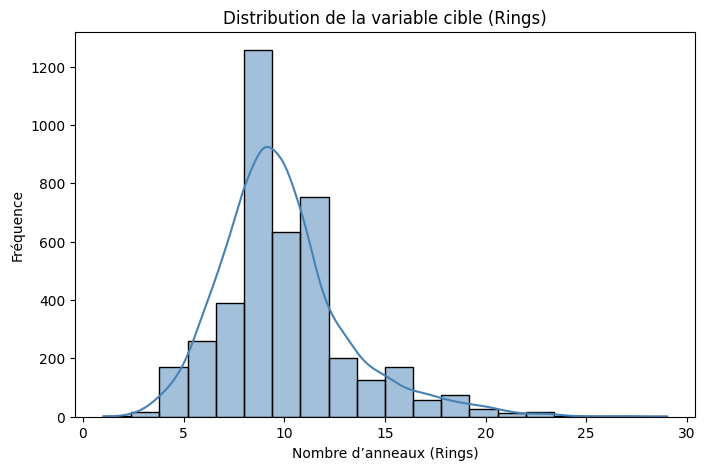

In [7]:
# Aperçu de la variable cible : Rings
plt.figure(figsize=(8,5))
sns.histplot(df["Rings"], bins=20, kde=True, color='steelblue')
plt.title("Distribution de la variable cible (Rings)")
plt.xlabel("Nombre d’anneaux (Rings)")
plt.ylabel("Fréquence")
plt.show()


/var/folders/kg/kfs42kh56l91cr2y6vt0_djr0000gn/T/ipykernel_40571/3949408295.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Sex", data=df, palette="pastel")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group

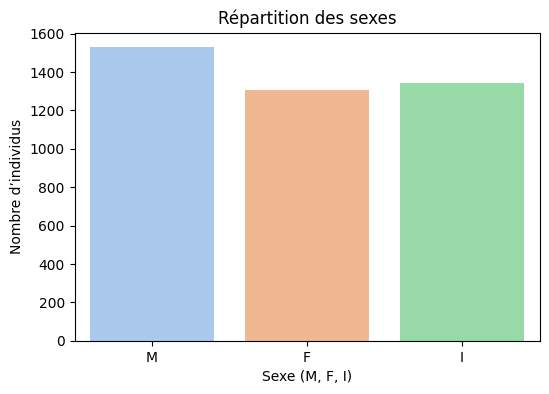

In [8]:
# Répartition de la variable catégorielle 'Sex'
plt.figure(figsize=(6,4))
sns.countplot(x="Sex", data=df, palette="pastel")
plt.title("Répartition des sexes")
plt.xlabel("Sexe (M, F, I)")
plt.ylabel("Nombre d’individus")
plt.show()


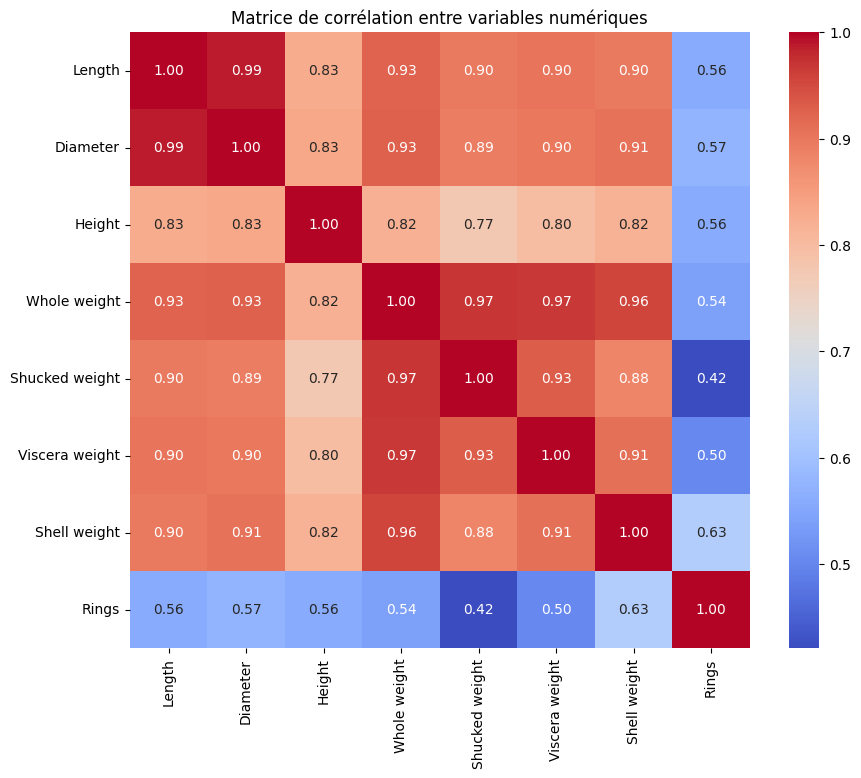

In [9]:
# Matrice de corrélation entre variables numériques
plt.figure(figsize=(10,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matrice de corrélation entre variables numériques")
plt.show()


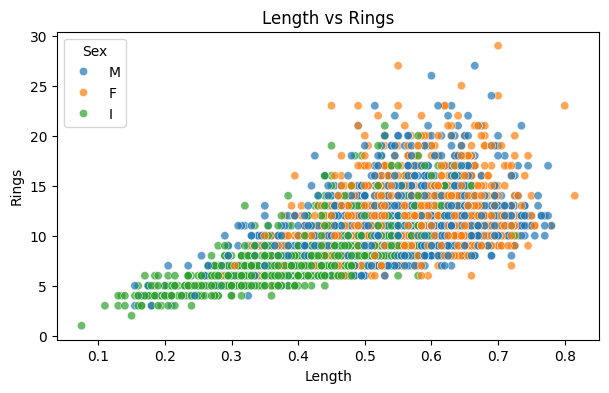

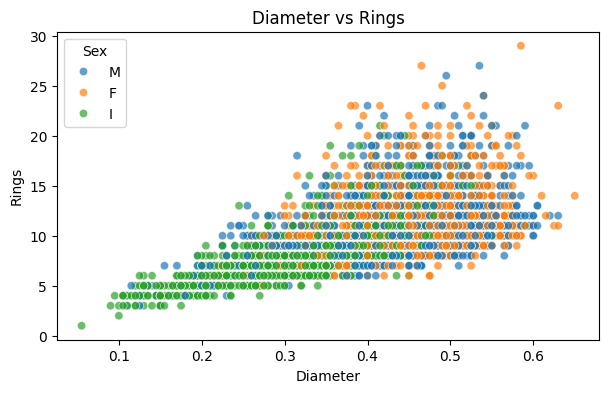

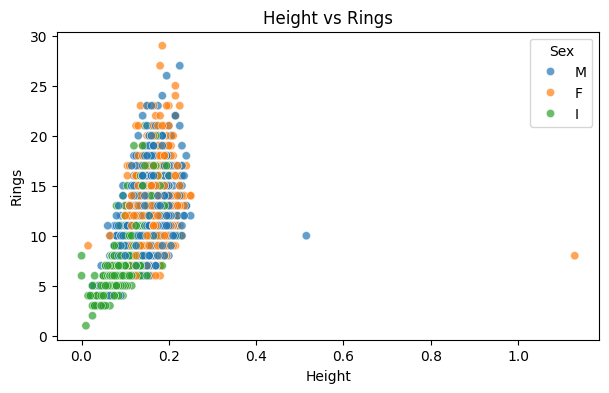

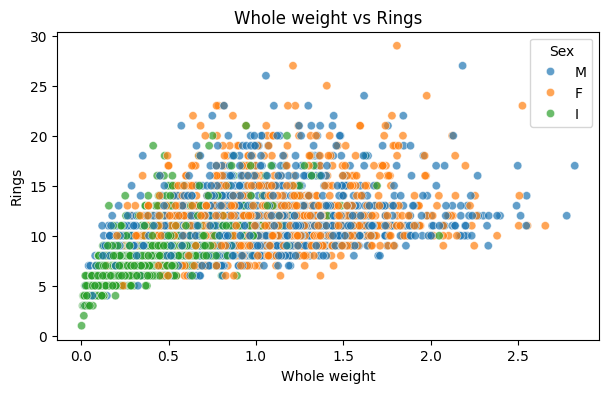

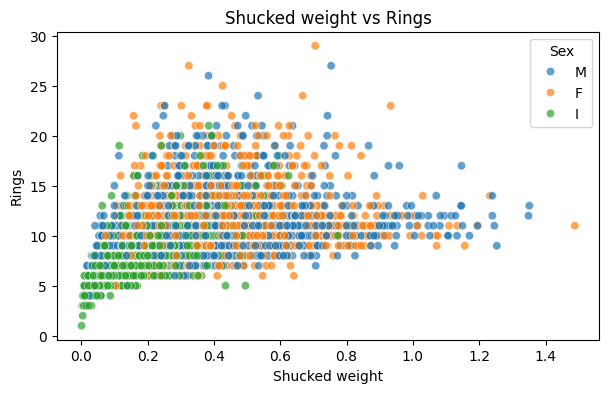

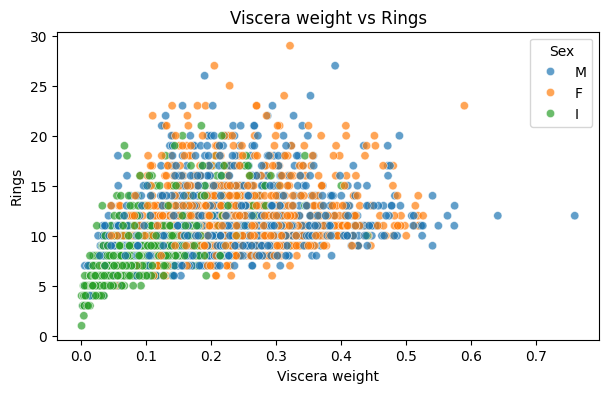

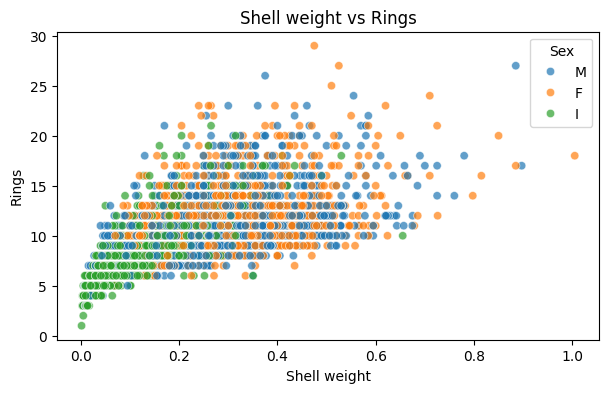

In [10]:
# Analyse de relations variables ↔ Rings
num_features = ["Length","Diameter","Height","Whole weight","Shucked weight","Viscera weight","Shell weight"]

for feature in num_features:
    plt.figure(figsize=(7,4))
    sns.scatterplot(x=feature, y="Rings", hue="Sex", data=df, alpha=0.7)
    plt.title(f"{feature} vs Rings")
    plt.show()


/var/folders/kg/kfs42kh56l91cr2y6vt0_djr0000gn/T/ipykernel_40571/3628115890.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Sex", y=feature, data=df, palette="Set2")


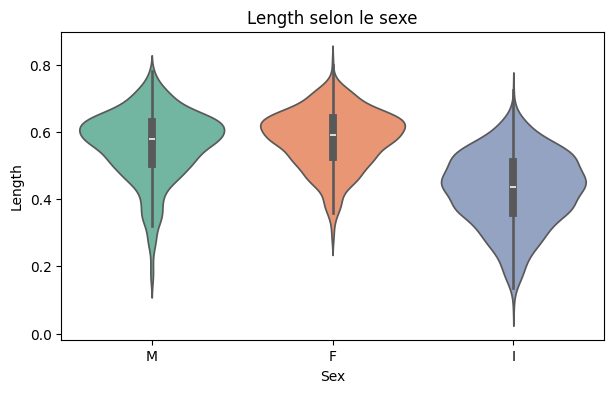

/var/folders/kg/kfs42kh56l91cr2y6vt0_djr0000gn/T/ipykernel_40571/3628115890.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Sex", y=feature, data=df, palette="Set2")


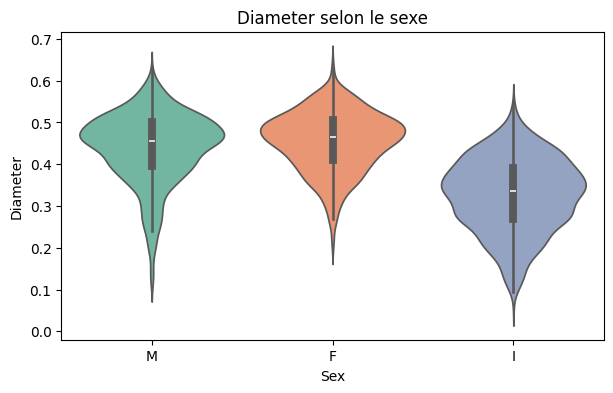

/var/folders/kg/kfs42kh56l91cr2y6vt0_djr0000gn/T/ipykernel_40571/3628115890.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Sex", y=feature, data=df, palette="Set2")


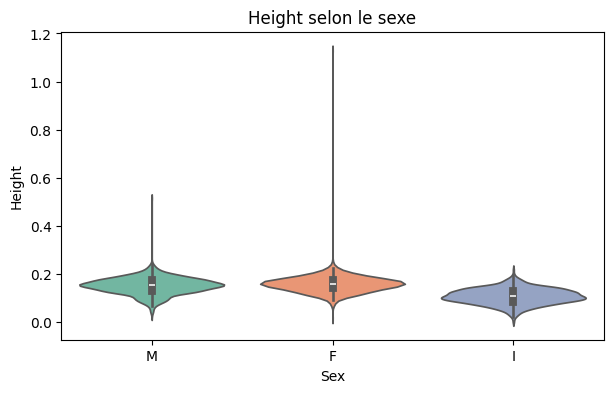

/var/folders/kg/kfs42kh56l91cr2y6vt0_djr0000gn/T/ipykernel_40571/3628115890.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Sex", y=feature, data=df, palette="Set2")


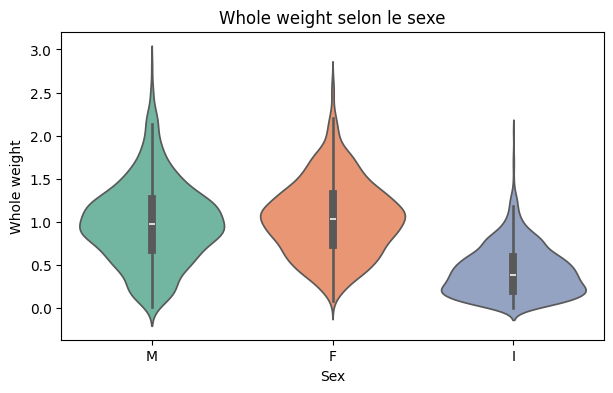

/var/folders/kg/kfs42kh56l91cr2y6vt0_djr0000gn/T/ipykernel_40571/3628115890.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Sex", y=feature, data=df, palette="Set2")


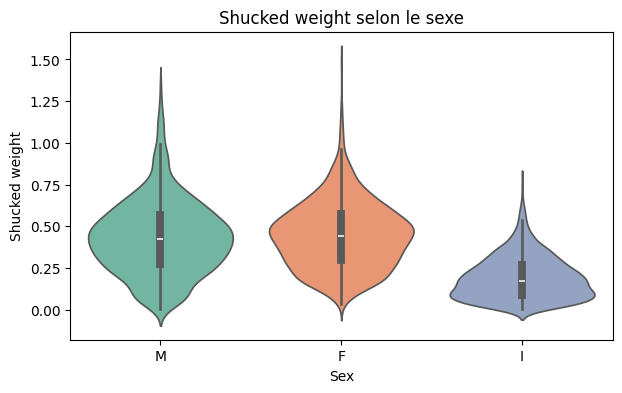

/var/folders/kg/kfs42kh56l91cr2y6vt0_djr0000gn/T/ipykernel_40571/3628115890.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Sex", y=feature, data=df, palette="Set2")


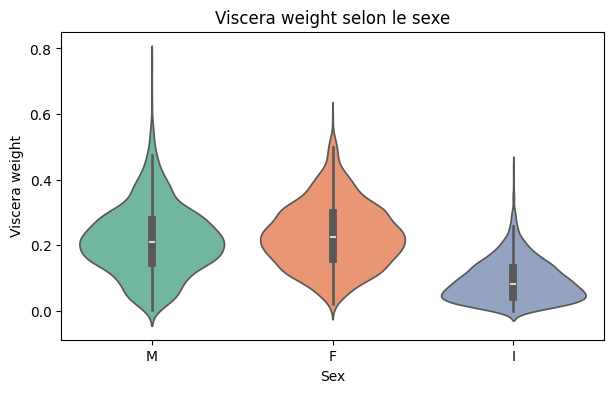

/var/folders/kg/kfs42kh56l91cr2y6vt0_djr0000gn/T/ipykernel_40571/3628115890.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Sex", y=feature, data=df, palette="Set2")


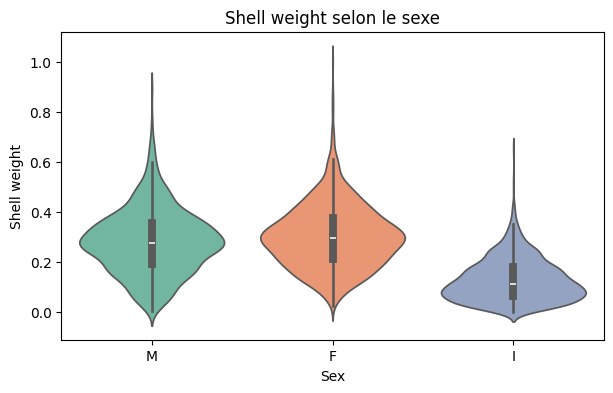

In [11]:
# Distribution des variables numériques selon le sexe
for feature in num_features:
    plt.figure(figsize=(7,4))
    sns.violinplot(x="Sex", y=feature, data=df, palette="Set2")
    plt.title(f"{feature} selon le sexe")
    plt.show()


In [12]:
# Statistiques descriptives groupées par sexe
df.groupby("Sex")["Rings"].describe()


,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
F,1307.0,11.129304,3.104256,5.0,9.0,10.0,12.0,29.0
I,1342.0,7.890462,2.511554,1.0,6.0,8.0,9.0,21.0
M,1528.0,10.705497,3.026349,3.0,9.0,10.0,12.0,27.0


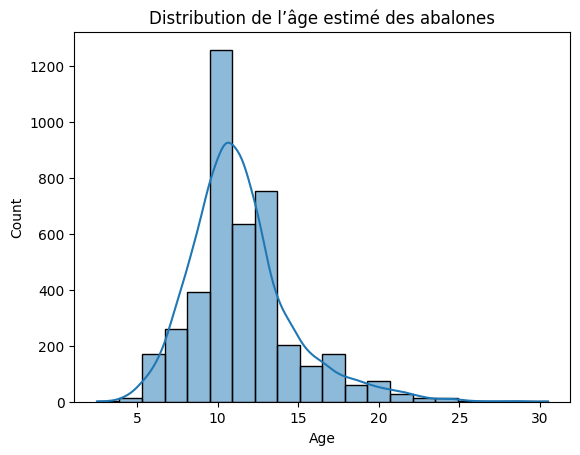

In [13]:
# Créer une variable Age
df["Age"] = df["Rings"] + 1.5  # comme suggéré par la source Kaggle
sns.histplot(df["Age"], bins=20, kde=True)
plt.title("Distribution de l’âge estimé des abalones")
plt.show()
